In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the data
data = pd.read_json("C:/Users/Mrinal Kalita/Python Projects/NLP Project/Sarcasm_Headlines_Dataset.json", lines=True)

In [4]:
#checking the first 5 row
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
#Checking the shape of the datta
data.shape

(28619, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


There are no missig values in the dataset.

In [7]:
#Checking the duplicate values
data.duplicated().sum()

2

There are two duplicate values in the dataset.

In [8]:
#Dropping the duplicate rows
data = data.drop_duplicates()

In [9]:
#Retaining the relevent columns
df = data.loc[:,['is_sarcastic','headline']] #Removed article link column as it is not rleven tfor our analysis

0    14984
1    13633
Name: is_sarcastic, dtype: int64


<Axes: xlabel='is_sarcastic', ylabel='count'>

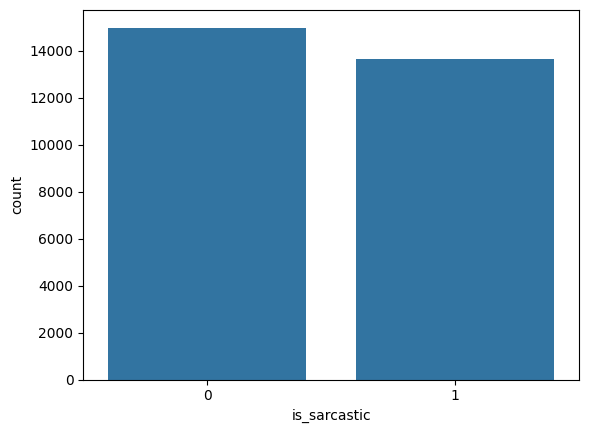

In [10]:
#Checking the distribution of is_sarcastic column (target)
print(df['is_sarcastic'].value_counts())
sns.countplot(data=df, x='is_sarcastic')

The data is evenly distributed.

In [11]:
#Checking the length of each sentence
df['length'] = [len(sen.split()) for sen in df['headline']]

In [12]:
df.head()

,is_sarcastic,headline,length
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9


In [13]:
#Chhecking 5 point summary of length column
df.describe()

,is_sarcastic,length
count,28617.000000,28617.000000
mean,0.476395,10.050145
std,0.499451,3.388232
min,0.000000,2.000000
25%,0.000000,8.000000
50%,0.000000,10.000000
75%,1.000000,12.000000
max,1.000000,151.000000


* Mean length = 10.5
* Median length = 10
* Max Length = 151
* Min length = 2
* Std = 3.39

<Axes: xlabel='length', ylabel='Count'>

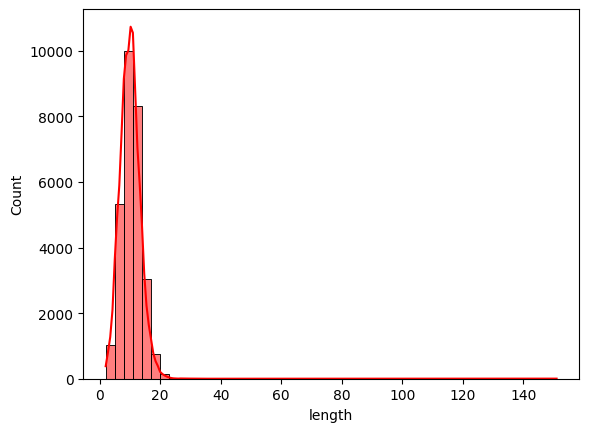

In [14]:
#Checking the distribution of length
sns.histplot(data=df, x = 'length',binwidth=3,kde=True, color='r')

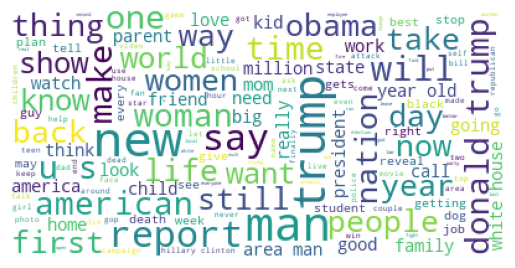

In [15]:
#Plottting wordcloud for headline
from wordcloud import WordCloud
all_texts = " ".join(txt for txt in df['headline'])
wrdcld = WordCloud(max_words=150, max_font_size=40,background_color='white')
plt.imshow(wrdcld.generate(all_texts))
plt.axis('off')
plt.show()

In [16]:
#Defining the parameters
max_features = 10000
max_len = max([len(txt.split()) for txt in df['headline']])
embeding_size = 100

In [17]:
#Tokenizing using keras 
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['headline'])

In [18]:
#Checking the indices of words
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'at': 14,
 'from': 15,
 'about': 16,
 'by': 17,
 'after': 18,
 'you': 19,
 'this': 20,
 'out': 21,
 'up': 22,
 'be': 23,
 'as': 24,
 'that': 25,
 'it': 26,
 'how': 27,
 'not': 28,
 'he': 29,
 'his': 30,
 'are': 31,
 'your': 32,
 'just': 33,
 'what': 34,
 'all': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'report': 39,
 'into': 40,
 'more': 41,
 'one': 42,
 'have': 43,
 'year': 44,
 'over': 45,
 'why': 46,
 'day': 47,
 'u': 48,
 'area': 49,
 'woman': 50,
 'can': 51,
 's': 52,
 'says': 53,
 'donald': 54,
 'time': 55,
 'first': 56,
 'like': 57,
 'no': 58,
 'her': 59,
 'get': 60,
 'off': 61,
 'old': 62,
 "trump's": 63,
 'life': 64,
 'now': 65,
 'people': 66,
 "'": 67,
 'an': 68,
 'house': 69,
 'still': 70,
 'obama': 71,
 'white': 72,
 'back': 73,
 'make': 74,
 'was': 75,
 'than': 76,
 'women': 77,
 'if': 78,
 'down': 79,
 'when': 80,
 'i': 81,
 'my':

In [19]:
#Checking the wordcounts
tokenizer.word_counts

OrderedDict([('thirtysomething', 1),
             ('scientists', 103),
             ('unveil', 13),
             ('doomsday', 4),
             ('clock', 16),
             ('of', 6292),
             ('hair', 61),
             ('loss', 39),
             ('dem', 4),
             ('rep', 25),
             ('totally', 54),
             ('nails', 13),
             ('why', 509),
             ('congress', 139),
             ('is', 1711),
             ('falling', 24),
             ('short', 41),
             ('on', 2656),
             ('gender', 29),
             ('racial', 20),
             ('equality', 24),
             ('eat', 48),
             ('your', 667),
             ('veggies', 2),
             ('9', 131),
             ('deliciously', 1),
             ('different', 62),
             ('recipes', 30),
             ('inclement', 2),
             ('weather', 28),
             ('prevents', 5),
             ('liar', 6),
             ('from', 1329),
             ('getting', 211),
            

In [20]:
#Creating features and labels
from tensorflow.keras.preprocessing.sequence import pad_sequences
x = tokenizer.texts_to_sequences(df['headline'])
x = pad_sequences(x,maxlen=max_len,padding='post')
y = np.array(df['is_sarcastic'])

In [21]:
#Get the vocabulary size
vocab_size = len(tokenizer.word_index)
print("Vocabulary size",vocab_size)

Vocabulary size 30884


In [22]:
from tqdm import tqdm
glove_file = open('C:/Users/Mrinal Kalita/Python Projects/NLP Project/glove.6B.100d.txt',encoding="utf8")

embedding_index = {}
for line in tqdm(glove_file):
    # Splitting the each line 
    values = line.split()
    
    word = values[0]
    
    coefs = np.array(values[1:], dtype='float32')
    
    embedding_index[word] = coefs
    
glove_file.close()

print('Found %s word vectors.' % len(embedding_index))


400000it [00:31, 12571.83it/s]

Found 400000 word vectors.


In [23]:
embedding_matrix = np.zeros((vocab_size+1,embeding_size))

for w, i in tokenizer.word_index.items():
    embed_vec = embedding_index.get(w)

    if embed_vec is not None:
        embedding_matrix[i,:] = embed_vec

In [24]:
#Splitting the data in to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=1)

## Model Building(LSTM)

In [21]:
#Building and compiling the model
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.Embedding(input_dim = vocab_size+1, output_dim = embeding_size, input_length = max_len,weights = [embedding_matrix]))
lstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200,dropout = 0.2)))
lstm.add(tf.keras.layers.Dense(264,activation='relu'))
lstm.add(tf.keras.layers.Dropout(0.2))
lstm.add(tf.keras.layers.Dense(128,activation='relu'))
lstm.add(tf.keras.layers.Dropout(0.2))
lstm.add(tf.keras.layers.Dense(1,activation='sigmoid'))

lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 151, 100)          3088500   
_________________________________________________________________
bidirectional (Bidirectional (None, 400)               481600    
_________________________________________________________________
dense (Dense)                (None, 264)               105864    
_________________________________________________________________
dropout (Dropout)            (None, 264)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               33920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [23]:
#Defining the callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
stop = EarlyStopping(patience=13)
reduce_lr = ReduceLROnPlateau(factor=0.1,verbose=1,patience=6)

In [24]:
#Training the model
history2 = lstm.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=32,callbacks=[stop, reduce_lr])

Epoch 1/50
573/573 [==============================] - 141s 247ms/step - loss: 0.4420 - accuracy: 0.7886 - val_loss: 0.3329 - val_accuracy: 0.8482
Epoch 2/50
573/573 [==============================] - 136s 238ms/step - loss: 0.2896 - accuracy: 0.8761 - val_loss: 0.2942 - val_accuracy: 0.8744
Epoch 3/50
573/573 [==============================] - 133s 231ms/step - loss: 0.2059 - accuracy: 0.9175 - val_loss: 0.2837 - val_accuracy: 0.8794
Epoch 4/50
573/573 [==============================] - 140s 244ms/step - loss: 0.1508 - accuracy: 0.9402 - val_loss: 0.3513 - val_accuracy: 0.8666
Epoch 5/50
573/573 [==============================] - 138s 240ms/step - loss: 0.1083 - accuracy: 0.9570 - val_loss: 0.3814 - val_accuracy: 0.8718
Epoch 6/50
573/573 [==============================] - 135s 235ms/step - loss: 0.0799 - accuracy: 0.9694 - val_loss: 0.4179 - val_accuracy: 0.8698
Epoch 7/50
573/573 [==============================] - 132s 231ms/step - loss: 0.1681 - accuracy: 0.9375 - val_loss: 0.4446 -

In [26]:
#Saving the model
lstm.save('lstm_model.h5')

In [31]:
hist = pd.DataFrame({'epoch':history2.epoch,'loss':history2.history['loss'],'val_loss':history2.history['val_loss'],'accuracy':history2.history['accuracy'],'val_accuracy':history2.history['val_accuracy']})

In [35]:
hist.to_csv('lsmt_history.csv')

In [29]:
#Loading history and model
history = pd.read_csv('C:/Users/Mrinal Kalita/Python Projects/NLP Project/lsmt_history.csv')
lstm = tf.keras.models.load_model('C:/Users/Mrinal Kalita/Python Projects/NLP Project/lstm_model.h5')

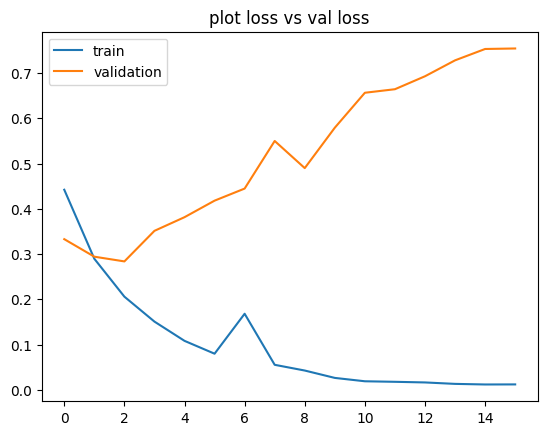

In [31]:
#plot train and val loss
plt.plot(history.epoch,history['loss'])
plt.plot(history.epoch,history['val_loss'])
plt.title("plot loss vs val loss")
plt.legend(("train", "validation"))
plt.show()

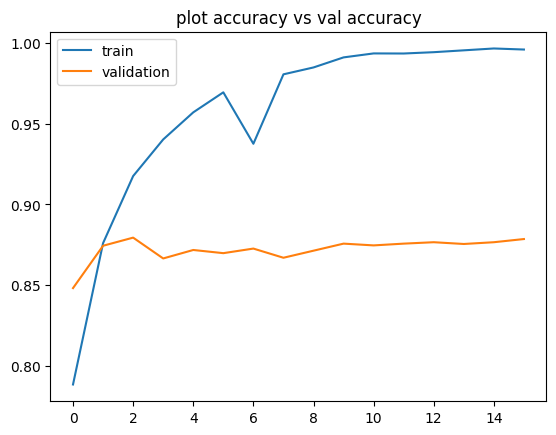

In [32]:
#plot train and val accuracy
plt.plot(history.epoch,history['accuracy'])
plt.plot(history.epoch,history['val_accuracy'])
plt.title("plot accuracy vs val accuracy")
plt.legend(("train", "validation"))
plt.show()

We can see that validatiion accuracy is almost constant at around 87% as epochs increases.

In [33]:
#Prediction for x_test
y_pred = lstm.predict(x_test)
y_pred = y_pred>0.5
y_pred

179/179 [==============================] - 38s 199ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

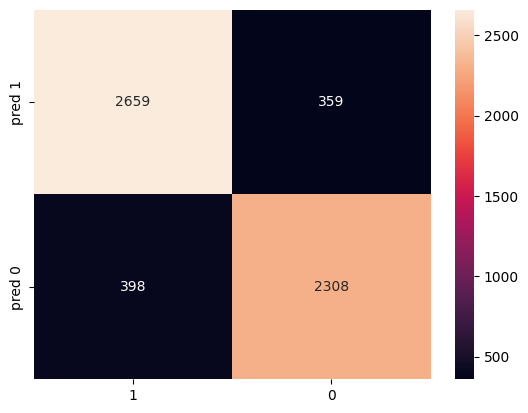

In [36]:
#Plotting the confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['1','0'],index = ['pred 1','pred 0'])
sns.heatmap(cm,fmt='0.04g',annot=True)

In [37]:
#Printing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3018
           1       0.87      0.85      0.86      2706

    accuracy                           0.87      5724
   macro avg       0.87      0.87      0.87      5724
weighted avg       0.87      0.87      0.87      5724



The model has an accuracy of 87% and macro f1 score of 0.87.